# Introduction to Regression with Neural Networks in TensorFlow

In [ ]:
# Importing tensorflow
import tensorflow as tf

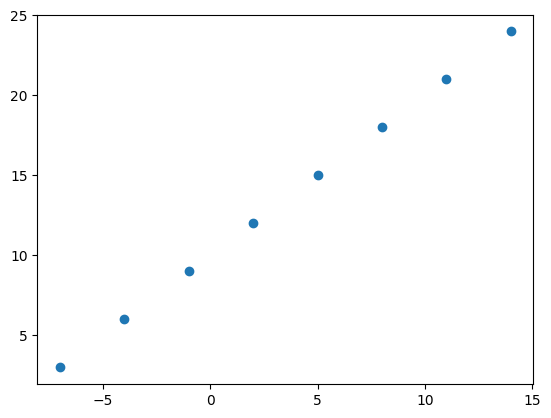

In [3]:
# Creating data to view and fit:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create target/label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X,y)

In [ ]:
y == X + 10 # This is the relationship that we want the NN to learn. So our dependent variable Y is dependent on 10 + independent variable X

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:
input_shape  = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # Scalars are 0-rank tensors

((), ())

In [11]:
X[0].ndim

0

In [ ]:
# Turning the NumPy arrays into tensors
X = tf.cast(X, dtype=tf.float32) #float32 because thats what the model uses
y = tf.cast(y, dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [39]:
input_shape  = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # It is a scalar because we are taking 1 input feature, to predict 1 output, so -7 to guess 3.

(TensorShape([]), TensorShape([]))

### Steps in modelling with tensorflow

In [ ]:
# Creating a model - define the input and output layers, as well as the hidden layers.
# Complie the model - define the loss function (it tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning)
# and evaluation metrics ( What we can use to interpret the performance of our model).
# Fitting a model - letting a model try to find patterns between X & y

# Step 1 -  Get data ready (turn into tensors) (figure out the shape of ur input and output)
# Step 2 - Build or pick a pretrained model
# Step 3 - Fit the model to the data and make a prediction
# Step 4 - Evaluate the model
# Step 5 - Improve through Experimentation

# How it pretty much looks like

# model = tf.keras.Sequential([
#     tf.keras.Input(shape=(3,)), #3 inputs
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(100, activation="relu"), 
#     tf.keras.layers.Dense(1, activation=None), # 1 output
# ])

# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.Adam(lr=0.0001), # the lower the learning rate the less steps the model takes when trying to improve.
#               metrics=["mae"])

# model.fit(X_train, y_train, epochs = 50)

In [40]:
# Seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API (its like saying I wanna create a model and i want you to sequentially go thru the following)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)  # We are taking 1 number to predict 1 number
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error, less prone to outliers in dataset.
              optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 10.4344 - mae: 10.4344
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.3019 - mae: 10.3019
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.1694 - mae: 10.1694
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.0369 - mae: 10.0369
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.9044 - mae: 9.9044


In [41]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a predict
# Our prediction is off by a loss of 10 units!
model.predict(tf.expand_dims([17.0], axis=-1)) # we are expanding dims again because thats wht the model was trained on

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[17.914865]], dtype=float32)

### Improving the model

In [ ]:
# We can improve our model, by altering the steps we took to create a model.
# 1. Creating a model -  we might add more layers, increase neurons, and change the activation functions of each layer
# 2. Compiling a model -  we might change the optimization function, or learning rate (hyperparameter) of the optimizer
# 3. Fiting a model -  we might fit a model for more epochs or give the model more data


## Common ways - 
# Increase number of hidden units/ or decrease
# Change activation functions
# Change the optimization function
# Change the learning rate. ( one of the most important ones we can tune)

In [69]:
# Lets rebuild our model this time with some changes

# 1. Create the model:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

# 2. Model Compiling:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 13.3218 - mae: 13.3218
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.7157 - mae: 12.7157
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.1378 - mae: 12.1378
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.5776 - mae: 11.5776
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.0088 - mae: 11.0088
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.4292 - mae: 10.4292
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.8282 - mae: 9.8282
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.2121 - mae: 9.2121
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.5582 - mae: 8.5582
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.8645 - mae: 7.8645
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.1242 - mae: 7.1242
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.3303 - mae: 6.3303
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [70]:
model.predict(tf.expand_dims([17.0], axis=-1))  # So just adding a layer and more epochs reduces our loss  alot
# However it seems like our model is actually overfitting hmm..

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[32.297474]], dtype=float32)

In [71]:
# lets try it again

# 1. Creating the model:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model:
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'] )

# 3. Fitting the model:
model.fit(tf.expand_dims(X ,axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 12.1505 - mae: 12.1505
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.5661 - mae: 11.5661
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.9730 - mae: 10.9730
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.3682 - mae: 10.3682
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.7486 - mae: 9.7486
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.1109 - mae: 9.1109
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 8.4519 - mae: 8.4519
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.7682 - mae: 7.7682
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.2722 - mae: 7.2722
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.2494 - mae: 7.2494
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.2266 - mae: 7.2266
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.2038 - mae: 7.2038
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [72]:
model.predict(tf.expand_dims([17.0], axis=-1)) # ahh it seems like reducing the neurons and setting the activation to None, increased the loss however made the model more accurate ...hmm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[31.829514]], dtype=float32)

In [76]:
# lets try it again with a new optimizer

# 1. Creating the model:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model:
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'] )

# 3. Fitting the model:
model.fit(tf.expand_dims(X ,axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - loss: 14.2884 - mae: 14.2884
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.5597 - mae: 13.5597
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.8287 - mae: 12.8287
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.0947 - mae: 12.0947
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.3564 - mae: 11.3564
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.6121 - mae: 10.6121
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.8597 - mae: 9.8597
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.0971 - mae: 9.0971
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.3226 - mae: 8.3226
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.5340 - mae: 7.5340
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.7292 - mae: 6.7292
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.6205 - mae: 6.6205
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [77]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[27.26049]], dtype=float32)

### Evaluating a model

In [ ]:
# When it comes to evaluation its a good idea to visualize
# the data -what data are we working with? what does it look like?
# the model itself - what does our model look like ?
# the training of a model - How does a model perform while it learns?
# the predictions of the model -  how do the predictions of a model line up against the ground truth?

In [79]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Labels for the dataset
y = X + 10 # the pattern we want the model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

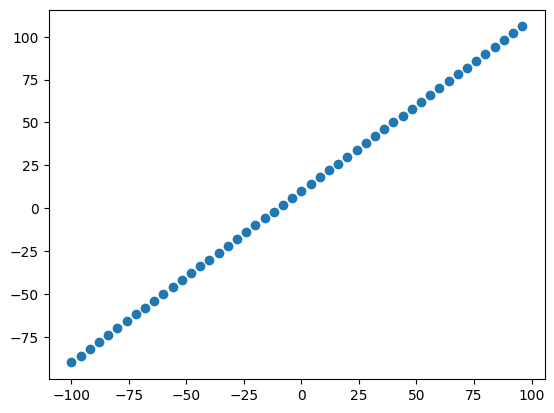

In [82]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets
* Training set -  The model learns from this data, which is 70-80% of the total data
* Validation set - The model gets tuned on this data, which is 10% ofthe data
* Test set -  The model gets evaluated on this data to test what is learned, typically 10-15% of the data.

In [83]:
# Checking the length of how many samples of we have:
len(X)

50

In [ ]:
# Spliting the data into train and test sets
X_train = X[:40] # taking the first 40 training samples.
X_test = X[40:] # the last 10 samples.

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test) 

(40, 10)

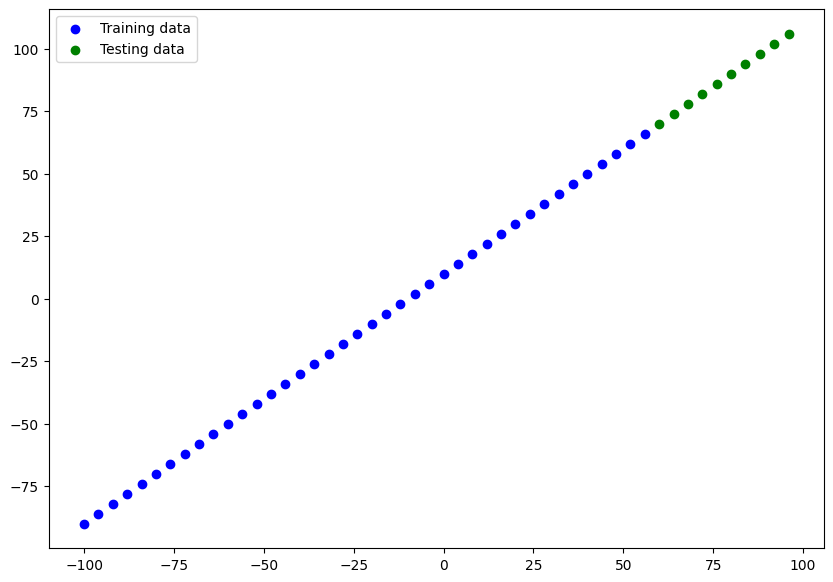

In [87]:
# Visualizing the train and test sets
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [96]:
# Lets build a neural network for this dataset

tf.random.set_seed(42)

# 1. Creating a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),#Setting the input shape here, X[0].shape gives nthn its just 1 number, its a scalar (0 rank tensor), so we give 1 here.
    tf.keras.layers.Dense(1)
])
    

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose 0 is silent.

In [97]:
model.summary() # Shows how our model looks, all the layers etc.
# Total params -  total parameters in the model 
# trainable params -  These are the parameters (patterns) the model can update as it trains. ( weight / bias)
# Non-trainable params - These parameters arent updated during training ( when you bring in already learnt patterns or parameters
# from other models during TRANSFER LEARNING)

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [108]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[ 69.18937 ],
       [ 73.709076],
       [ 78.22878 ],
       [ 82.74849 ],
       [ 87.268196],
       [ 91.7879  ],
       [ 96.30762 ],
       [100.827324],
       [105.34703 ],
       [109.86674 ]], dtype=float32)

In [109]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [111]:
# Lets make a function to see how our predictions are to our data
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
    """Plots Training data, test data and compares predictions to ground truth"""
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    plt.scatter(test_data, predictions, c='r', label="Predictions")
    plt.legend()
    plt.show()

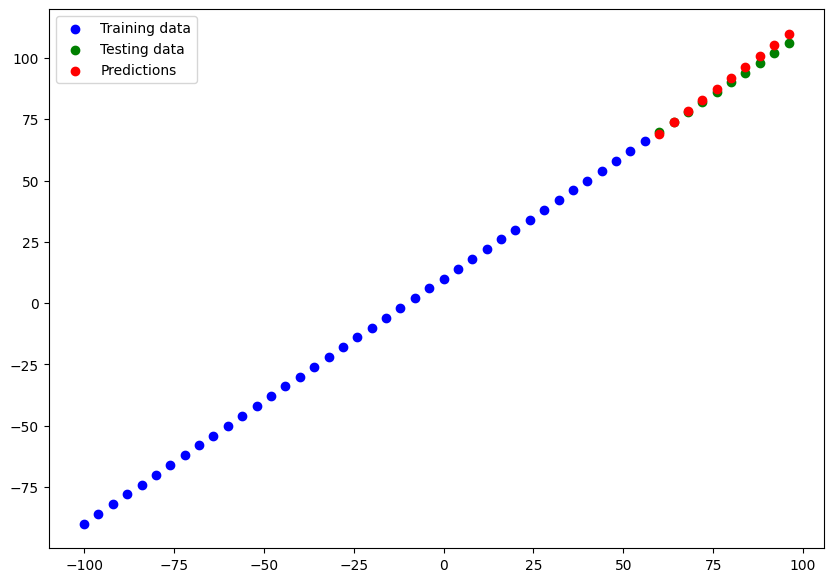

In [113]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [ ]:
# Lets do 3 modeling experiments:
# model_1 - same as the original model, 1 layer, trained for 100 epochs
# model_2 - 2 layers, trained for 100 epochs
# model_3 - 2 layers, trained for 500 epochs

In [117]:
# setting a seed:
tf.random.set_seed(42)

# Building model_1:
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(X_train, y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


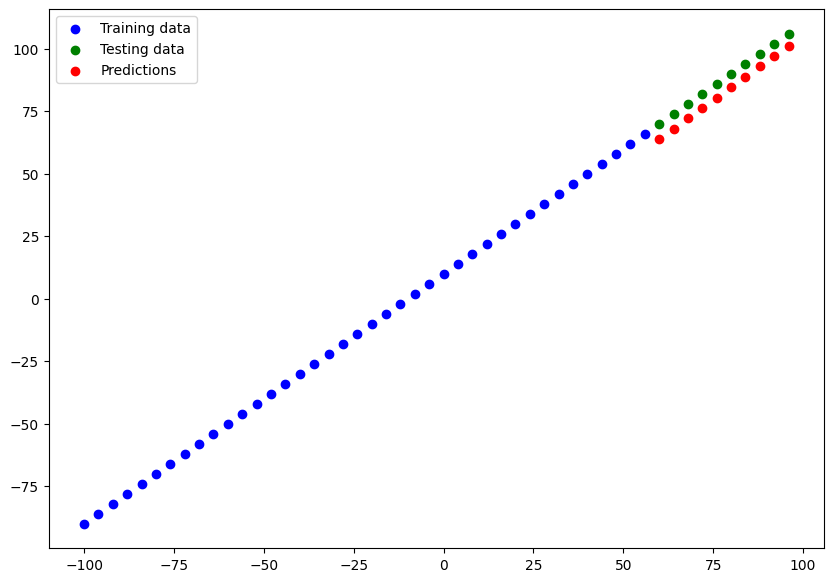

In [147]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [149]:
model_1.evaluate(y_test, y_pred_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.4003 - mae: 10.4003


[10.40029525756836, 10.40029525756836]

In [150]:
mae = tf.keras.losses.MeanAbsoluteError()
mae_1 = mae(y_test, tf.squeeze(y_pred_1)) # We are squeezing it because of the extra dimension in y_pred_1
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=5.454570770263672>

In [151]:
y_pred_1.shape , y_test.shape ## see??

((10, 1), TensorShape([10]))

In [155]:
# Model 2:
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mse'])

model_2.fit(X_train , y_train, epochs = 100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


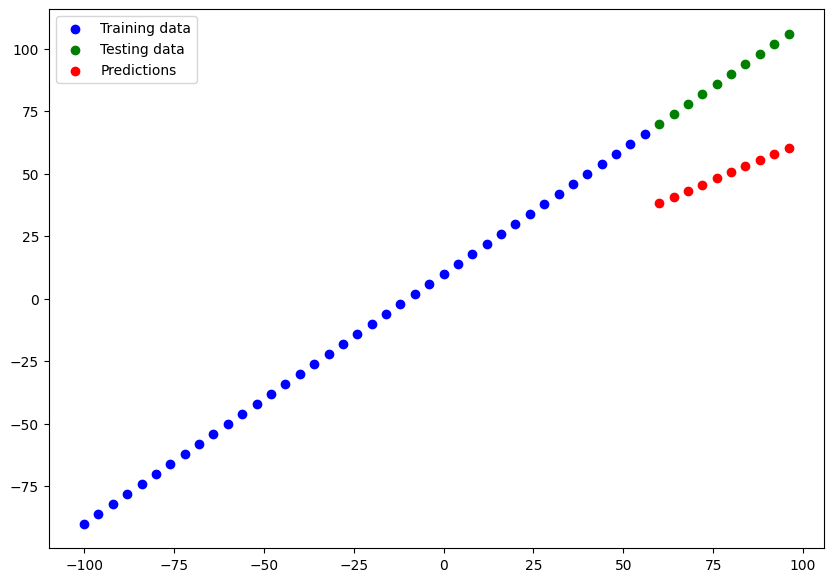

In [156]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [157]:
model_2.evaluate(y_test, y_pred_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 6.1225 - mse: 37.4850


[6.122499465942383, 37.4849967956543]

In [158]:
# Building model 3

model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


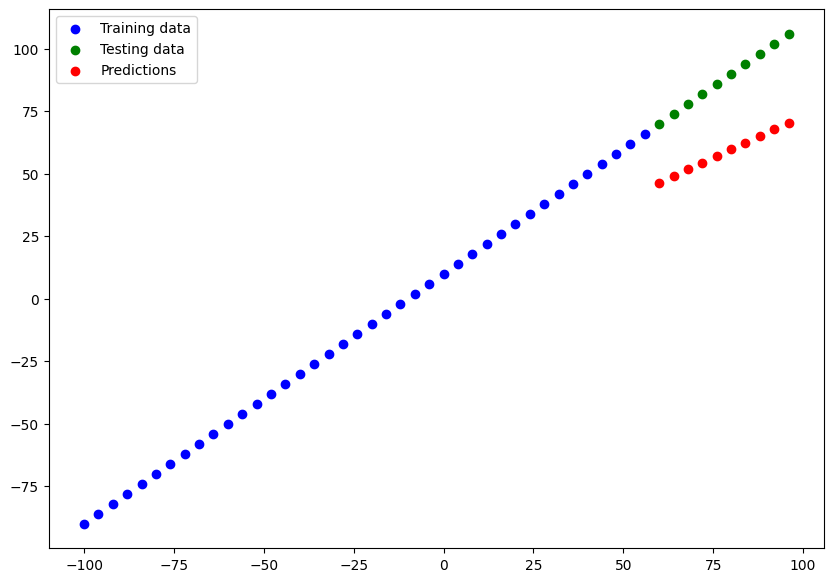

In [159]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [160]:
model_3.evaluate(y_test, y_pred_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 6.6651 - mse: 44.4236


[6.665106296539307, 44.423641204833984]

In [162]:
mae_3 = mae(y_test, tf.squeeze(y_pred_3))
mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=29.511856079101562>

In [ ]:
# Our model performed even worse! This shows that tuning all hyperparameters this high even if it feels like
# it may increase the accuracy is not TRUE! we overfitted the model here.

In [ ]:
# One good habit in ML is to track results of experiments and there is a component to help with that.
# Tensorboard -  a component of Tensorflow Library to help track modelling experiments.

### A larger example

In [163]:
import pandas as pd

In [164]:
# Read Insurance dataset
insurance = pd.read_csv('../data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [165]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [166]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010
